In [1]:
# https://github.com/pyproj4/pyproj
# Propdo.ai  - data driven real estate startup

#inspire with:
https://datadashboard.health.gov.il/COVID-19/general

In [2]:
import pandas as pd
import sqlite3

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # -darkgrid

In [4]:
# con = sqlite3.connect("nadlan_backup1.db")
con = sqlite3.connect("nadlan.db")

In [5]:
df = pd.read_sql("select * from trans",con=con)
df['tarIska'] = pd.to_datetime(df['tarIska'], format='%Y%m%d')
df = df[df['tarIska'] >= pd.to_datetime('2010-01-01')]
df = df.set_index('tarIska')
df['helekNimkar'] = df['helekNimkar'].astype(float)
print(len(df))
df = df[df['helekNimkar'] == 1.0]

500059


In [6]:
df.head()

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,tifkudBnyn,tifkudYchida,shumaHalakim,mofaGush,tava,mahutZchut,helekNimkar,corX,corY,insertionDate
tarIska,,,,,,,,,,,,,,,,,,,,,
2022-12-14,90 - מק-באר שבע,038089-0101-037-00,באר שבע,התלמוד,60,--,9,520000,520000,71,...,מגורים,דירה בבית קומות,1 / 1 ליחידה בשלמותה,2,0,בעלות,1.0,179527,575374,2022-12-18 01:47:28.892752
2022-12-14,29 - מק-מרכז,006386-0170-032-00,פתח תקווה,רוטשילד,162,--,32,2270000,2270000,77,...,מגורים,מחברה לפרטי,1 / 1 ליחידה בשלמותה,0,0,בעלות,1.0,189252,665041,2022-12-18 01:47:28.892752
2022-12-14,30 - מק-ירושלים,030695-0022-081-00,ירושלים,פרימו לוי,1,--,10,2500000,2500000,68,...,מגורים,דירה בבית קומות,1 / 1 ליחידה בשלמותה,0,0,בעלות,1.0,221360,628727,2022-12-18 01:47:28.892752
2022-12-14,50 - מק-תל אביב,007151-0238-007-00,בת ים,ההגנה,32,--,0,1985000,1985000,90,...,מגורים,מחברה לפרטי,1 / 1 ליחידה בשלמותה,1,0,בעלות,1.0,176834,658905,2022-12-18 01:47:28.892752
2022-12-14,65 - מק-חדרה,010570-0048-004-00,חדרה,שיבת ציון,43,--,0,3030000,3030000,148,...,מגורים,דירה בבית קומות,1 / 1 ליחידה בשלמותה,1,0,בעלות,1.0,189047,704898,2022-12-18 01:47:28.892752


In [7]:
# pd.options.display.float_format = '{:,.2f}'.format
# df['helekNimkar'].value_counts().head(10).plot(kind="bar")
len(df)

411784

In [8]:
df.columns

Index(['ezor', 'gush', 'yeshuv', 'rechov', 'bayit', 'knisa', 'dira',
       'mcirMozhar', 'mcirMorach', 'shetachBruto', 'shetachNeto', 'shnatBniya',
       'misHadarim', 'lblKoma', 'misKomot', 'dirotBnyn', 'hanaya', 'malit',
       'sugIska', 'tifkudBnyn', 'tifkudYchida', 'shumaHalakim', 'mofaGush',
       'tava', 'mahutZchut', 'helekNimkar', 'corX', 'corY', 'insertionDate'],
      dtype='object')

In [9]:
pd.options.display.float_format = '{:,.0f}'.format

In [10]:
df_g = df.groupby(['yeshuv', 'misHadarim', 'shnatBniya']).agg(mean=('mcirMozhar','mean'), std=('mcirMozhar','std'), size=('yeshuv', 'size'))
# {'mcirMozhar': {'mean_1': 'mean', 'std_1': 'std'}, 'yeshuv':'size'}
# f.agg(x=('A', max), y=('B', 'min'), z=('C', np.mean))
df_g

mean  std  size
yeshuv misHadarim shnatBniya                     
--     2          1970         369,999  NaN     1
       4          2017       1,000,000  NaN     1
                  2018       2,030,000  NaN     1
                  2019       1,288,998  NaN     1
       5          2019       2,500,000  NaN     1
...                                ...  ...   ...
תקוע   12         2009       2,200,000  NaN     1
תרום   5          2019       3,350,000  NaN     1
       6          2016       3,400,000  NaN     1
       7          2014       2,626,000  NaN     1
       8          1991       2,850,000  NaN     1

[28696 rows x 3 columns]

In [11]:
df[df['tifkudYchida'] == "מחברה לפרטי"]['shnatBniya'].value_counts().sort_index()

1920       2
1930       6
1940       5
1950      11
1960      40
1970     148
1980       1
1982       1
1987       2
1990       1
1992       3
1994       4
1995       1
1996       2
1998       2
1999       1
2000       3
2004       3
2006       1
2007       6
2010       1
2011       2
2012       2
2013      13
2014       4
2015      26
2016      74
2017     273
2018     495
2019    1039
2020    2162
2021    4885
2022    7081
2023    1776
2024    1159
2025     949
2026     124
2027      10
2028      36
2033       1
Name: shnatBniya, dtype: int64

In [12]:
df[df['tifkudYchida'] != "מחברה לפרטי"]['shnatBniya'].value_counts().sort_index()[-60:]

1974       35
1975       64
1976       23
1977       24
1978       26
1979       43
1980    11459
1981     1501
1982     2203
1983     1780
1984     1647
1985     2937
1986     1411
1987     1350
1988     1513
1989     1449
1990     8283
1991     2825
1992     3967
1993     3763
1994     3278
1995     5682
1996     4168
1997     4002
1998     4432
1999     3954
2000     8620
2001     2852
2002     3109
2003     2891
2004     2951
2005     3437
2006     2645
2007     2781
2008     3302
2009     3147
2010     5249
2011     3374
2012     4665
2013     5522
2014     5982
2015     7893
2016     8837
2017    15107
2018    27477
2019    32929
2020    27573
2021    22698
2022    12404
2023     4816
2024     2874
2025     1824
2026      202
2027      244
2028       51
2029        2
2030       12
2031       13
2032        2
2033        1
Name: shnatBniya, dtype: int64

In [13]:
df['tifkudYchida'].value_counts()

דירה בבית קומות       351390
מחברה לפרטי            20355
קוטג דו-משפחתי         11564
קוטג חד-משפחתי         10437
דירת גן                 9458
מפרטי לפרטי             2684
דירת גג )פנטהאוז(       2381
בית בודד                2059
מחברה לחברה              511
דירה במלון דירות         313
קוטג טורי                305
דירת דופלקס              271
מפרטי לחברה               54
בבנין מעורב מגורים         2
Name: tifkudYchida, dtype: int64

In [14]:
pd.to_datetime(df['shnatBniya']).dt.year

tarIska
2022-12-14    1970
2022-12-14    1970
2022-12-14    1970
2022-12-14    1970
2022-12-14    1970
              ... 
2022-12-15    1970
2022-12-15    1970
2022-12-15    1970
2022-12-21    1970
2022-12-31    1970
Name: shnatBniya, Length: 411784, dtype: int64

In [15]:
df['shnatBniya']

tarIska
2022-12-14    1960
2022-12-14    2025
2022-12-14    2009
2022-12-14    2016
2022-12-14    1950
              ... 
2022-12-15    2024
2022-12-15    2023
2022-12-15    2023
2022-12-21    1970
2022-12-31    1960
Name: shnatBniya, Length: 411784, dtype: int64

In [16]:
(df.index.year - df['shnatBniya']).value_counts()

 0      69040
 1      35056
 2      17077
-1      16072
 51     13674
        ...  
 86         2
 76         1
 87         1
 117        1
 96         1
Length: 125, dtype: int64

In [17]:
# df['newOrUsed'] = df['tifkudYchida'].apply(lambda x: "new" if x == "מחברה לפרטי" else "used")
# df['newOrUsed'] = df['shnatBniya'].apply(lambda x: "new" if x >= 2020 else "used")
df['year_sold_built_diff'] = df.index.year - df['shnatBniya']
df['newOrUsed'] = df['year_sold_built_diff'].apply(lambda x: "new" if x <= 0 else "used")

<AxesSubplot:xlabel='tarIska'>

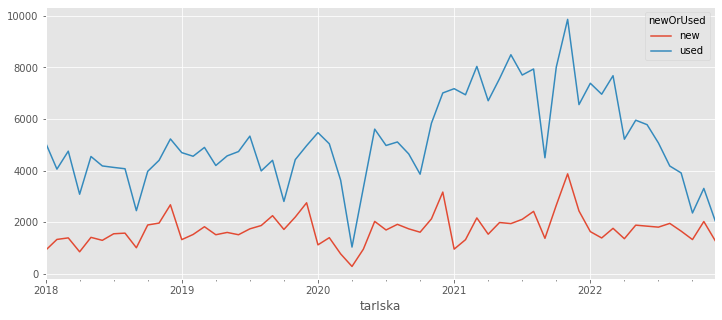

In [226]:
df.resample('M')['newOrUsed'].value_counts().unstack().plot(figsize=(12,5)) # .apply(lambda x: "new" if x == "מחברה לפרטי" else "used")

In [19]:
limit_cities = 10
yeshuv_lst = df['yeshuv'].value_counts()[:limit_cities].index.tolist()
cond_yeshuv_most = df['yeshuv'].isin(yeshuv_lst)
cond_full_sale = df['helekNimkar'] == 1

In [229]:
df.index.min()

Timestamp('2018-01-01 00:00:00')

In [231]:
def plot_colorize_pct(df, reverse=True):
    # https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red
    from  matplotlib.colors import LinearSegmentedColormap
    c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
    if reverse:
        c = c[::-1]
    v = [0,.1,.4,.5,.6,.9,1.]
    l = list(zip(v,c))
    cmap=LinearSegmentedColormap.from_list('rg',l, N=256)
    return df.style.background_gradient(cmap,axis=None, vmin=-0.5, vmax=0.5).format('{:,.2%}')
# cmap=LinearSegmentedColormap.from_list('rg',["darkred", "w", "darkgreen"], N=256) 
print("Number of sales")
dff = df[cond_yeshuv_most & cond_full_sale].groupby(['yeshuv']).resample('Q', convention='end', closed="left").size().T.pct_change().dropna()
plot_colorize_pct(dff)

Number of sales


yeshuv,אשדוד,אשקלון,באר שבע,בית שמש,חיפה,ירושלים,נתניה,פתח תקווה,ראשון לציון,תל אביב -יפו
tarIska,,,,,,,,,,
2018-06-30 00:00:00,-9.80%,-1.02%,-25.56%,-36.74%,-2.82%,-13.42%,-26.16%,-12.17%,-23.22%,0.31%
2018-09-30 00:00:00,-3.77%,-21.36%,-1.71%,-8.73%,-13.85%,-4.67%,-10.19%,-15.25%,1.55%,-15.37%
2018-12-31 00:00:00,29.95%,29.24%,51.45%,89.47%,25.29%,6.12%,28.92%,39.02%,10.65%,30.64%
2019-03-31 00:00:00,-4.79%,-3.03%,-2.11%,42.17%,-5.37%,9.34%,0.21%,-0.34%,15.13%,4.49%
2019-06-30 00:00:00,-4.84%,1.04%,-16.91%,-28.42%,-3.33%,-16.03%,-11.72%,1.52%,9.04%,11.29%
2019-09-30 00:00:00,0.78%,5.15%,16.59%,54.59%,10.20%,18.40%,22.99%,5.32%,23.32%,-2.29%
2019-12-31 00:00:00,-2.14%,78.04%,-5.85%,33.87%,-8.10%,-17.95%,11.18%,-10.88%,-26.90%,-4.57%
2020-03-31 00:00:00,1.59%,-12.78%,-5.25%,-42.57%,-2.39%,7.29%,-9.53%,3.01%,-10.59%,9.84%
2020-06-30 00:00:00,-31.25%,1.14%,-29.52%,-20.25%,-30.97%,-35.75%,-34.67%,-38.66%,-25.83%,-51.06%


In [21]:
print("Change in price")
dff = df[cond_yeshuv_most & cond_full_sale].groupby(['yeshuv']).resample('Q', convention='end', closed="left")['mcirMozhar'].mean() # .T.pct_change().dropna()
plot_colorize_pct(dff.unstack().T.pct_change().dropna())

Change in price


yeshuv,אשדוד,אשקלון,באר שבע,בית שמש,חיפה,ירושלים,נתניה,פתח תקווה,ראשון לציון,תל אביב -יפו
tarIska,,,,,,,,,,
2018-06-30 00:00:00,3.08%,-2.60%,-4.63%,2.87%,-0.19%,-2.21%,-0.58%,3.43%,-1.17%,7.64%
2018-09-30 00:00:00,0.49%,2.30%,-2.09%,2.75%,1.00%,3.02%,6.94%,-2.12%,-2.01%,-5.24%
2018-12-31 00:00:00,1.16%,2.72%,2.66%,-11.57%,-5.32%,1.38%,-4.56%,-1.32%,3.64%,-8.89%
2019-03-31 00:00:00,-2.58%,-4.94%,3.60%,-4.85%,8.52%,-0.26%,1.70%,3.02%,-4.91%,6.59%
2019-06-30 00:00:00,1.25%,4.56%,0.76%,8.79%,2.25%,-0.06%,-1.80%,0.75%,-8.34%,15.44%
2019-09-30 00:00:00,2.90%,3.01%,-2.91%,-6.82%,-1.10%,3.58%,4.57%,9.69%,4.89%,-13.86%
2019-12-31 00:00:00,-1.28%,-8.26%,2.75%,-5.14%,2.79%,2.21%,-9.20%,-8.77%,5.73%,3.57%
2020-03-31 00:00:00,5.27%,-0.79%,2.96%,18.97%,-4.08%,5.48%,1.82%,-1.02%,4.33%,6.75%
2020-06-30 00:00:00,-1.09%,2.50%,1.32%,-4.75%,2.60%,-3.77%,-0.74%,2.62%,-3.85%,-7.96%


<AxesSubplot:title={'center':'Prices'}, xlabel='tarIska'>

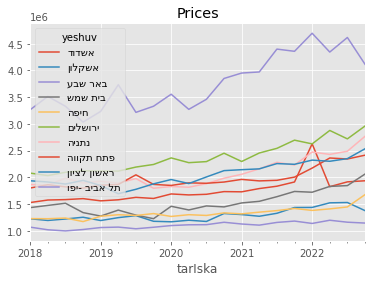

In [22]:
dff = df[cond_yeshuv_most & cond_full_sale].groupby(['yeshuv']).resample('Q', convention='end', closed="left")['mcirMozhar'].mean() # .T.pct_change().dropna()
dff.unstack().T.rename(columns=lambda x: x[::-1]).plot(title="Prices")

In [23]:
def apply_room(x):
    if x >= 6:
        return '+6'
    elif x <= 2.5:
        return '-2'
    else:
        return str(int(x))
df['misHadarim_m'] = df['misHadarim'].apply(apply_room)

<AxesSubplot:xlabel='tarIska'>

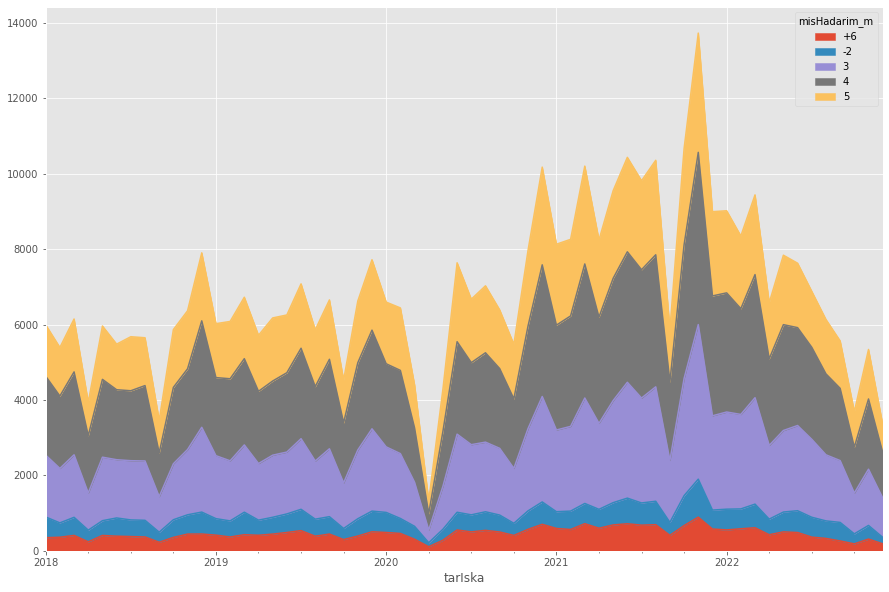

In [24]:
# plt.figure(figsize=(15,10))
df.resample('M')['misHadarim_m'].value_counts().unstack().plot(kind='area', stacked=True,figsize=(15,10))
# plt.show()

In [25]:
dff = df[cond_yeshuv_most].groupby(['yeshuv', 'misHadarim_m']).resample('M', convention='end', closed="left")['mcirMozhar'].agg(['mean', 'size', 'std']) # .mean() # .T.pct_change().dropna()

<Figure size 1440x1224 with 0 Axes>

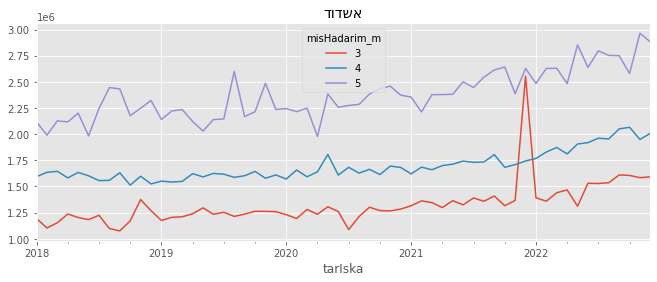

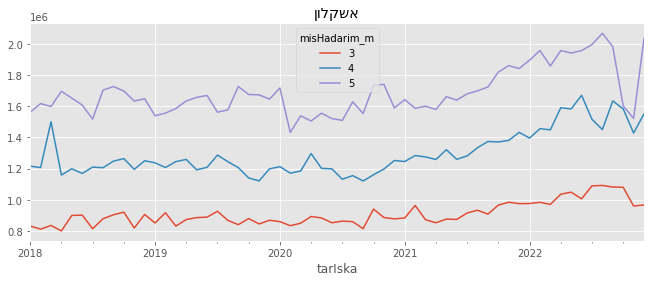

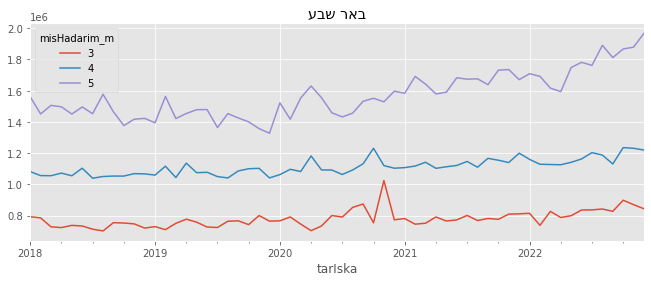

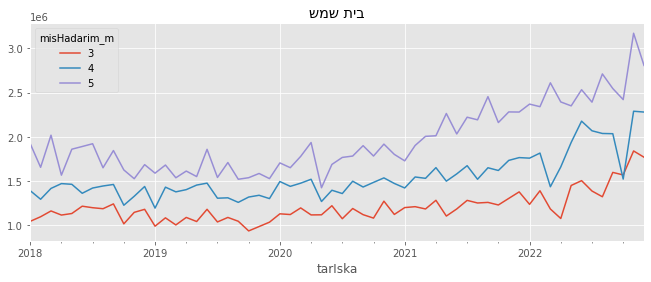

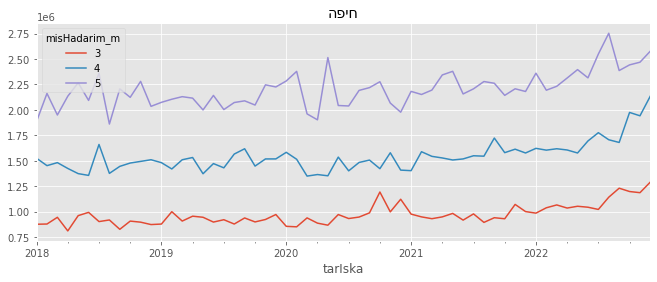

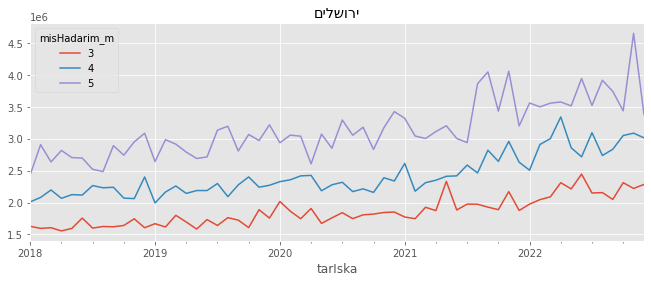

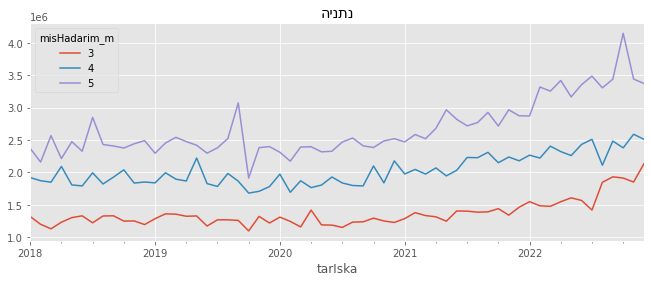

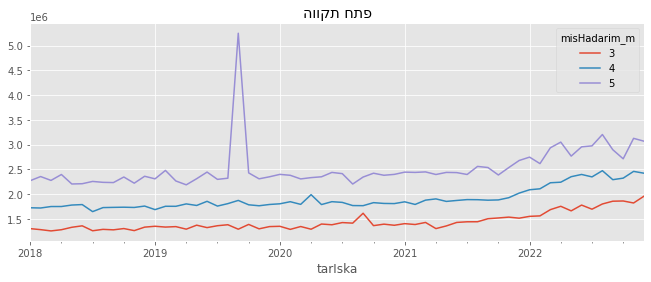

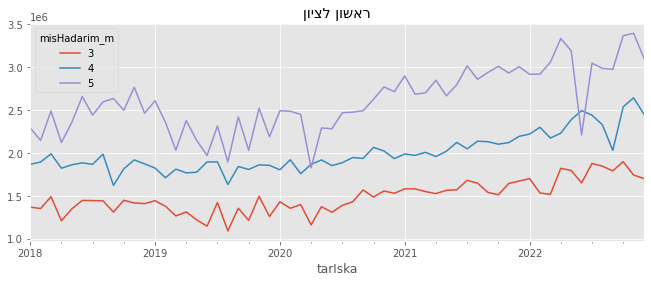

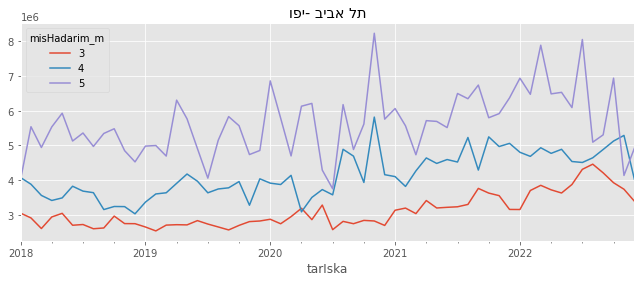

In [26]:
# Trying to plot area from 3 rooms to 5 rooms
colors = ['Red', 'Blue', 'Orange', 'Yellow', 'Green', 'Gray', 'Black', 'Lime']
plt.figure(figsize=(20,17))
for idx, tup in enumerate(dff.groupby(level=0)):
    row_id, data = tup
    color = colors[idx % len(colors)]
    pivot = data.reset_index().pivot(index='tarIska', columns='misHadarim_m', values='mean')
    pivot.drop(columns=['+6', '-2']).plot(kind='line', figsize=(11, 4), title=row_id[::-1])
#     pivot = data.reset_index().pivot(index='tarIska', columns='misHadarim_m', values=['mean', 'std']).drop(columns=[('mean', '+6'),
#                                                                                                        ('mean', '+6'),
#                                                                                                        ('mean', '-2'),
#                                                                                                        ('mean', '-2'),])
#     plt.errorbar(trip.index, trip['gas'], yerr=trip['std'])


In [28]:
prices.reset_index()

NameError: name 'prices' is not defined

In [29]:
d

NameError: name 'd' is not defined

In [30]:
cond = (df['mcirMozhar'] > 100000) & (df['shetachNeto'] > 20)

In [31]:
df['avg_per_m_net'] = df['mcirMozhar'] / df['shetachNeto']

In [32]:
df['shetachNeto'].value_counts().sort_index()

0           3490
1           1131
2             11
3             20
4             36
            ... 
2620000        1
3100000        1
9999999       16
88910000       1
99999999       1
Name: shetachNeto, Length: 1337, dtype: int64

In [33]:
df['avg_per_m_net'].max()

inf

In [34]:
df

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,tava,mahutZchut,helekNimkar,corX,corY,insertionDate,year_sold_built_diff,newOrUsed,misHadarim_m,avg_per_m_net
tarIska,,,,,,,,,,,,,,,,,,,,,
2022-12-14,90 - מק-באר שבע,038089-0101-037-00,באר שבע,התלמוד,60,--,9,520000,520000,71,...,0,בעלות,1,179527,575374,2022-12-18 01:47:28.892752,62,used,3,"8,387"
2022-12-14,29 - מק-מרכז,006386-0170-032-00,פתח תקווה,רוטשילד,162,--,32,2270000,2270000,77,...,0,בעלות,1,189252,665041,2022-12-18 01:47:28.892752,-3,new,3,"29,481"
2022-12-14,30 - מק-ירושלים,030695-0022-081-00,ירושלים,פרימו לוי,1,--,10,2500000,2500000,68,...,0,בעלות,1,221360,628727,2022-12-18 01:47:28.892752,13,used,3,"36,765"
2022-12-14,50 - מק-תל אביב,007151-0238-007-00,בת ים,ההגנה,32,--,0,1985000,1985000,90,...,0,בעלות,1,176834,658905,2022-12-18 01:47:28.892752,6,used,3,"22,056"
2022-12-14,65 - מק-חדרה,010570-0048-004-00,חדרה,שיבת ציון,43,--,0,3030000,3030000,148,...,0,בעלות,1,189047,704898,2022-12-18 01:47:28.892752,72,used,5,"79,737"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-15,29 - מק-מרכז,006232-0045-017-00,רמת גן,רמת גן - ללא רחוב,2,--,17,4700000,4700000,125,...,0,חכירה ממינהל,1,185318,660726,2023-01-17 09:41:45.456865,-2,new,5,"37,600"
2022-12-15,84 - מק-רחובות,002530-0038-018-00,קריית מלאכי,קריית מלאכ - ללא רחו,0,--,0,1903483,1903483,117,...,0,בעלות,1,174964,625921,2023-01-17 09:41:45.456865,-1,new,5,"16,269"
2022-12-15,29 - מק-מרכז,006499-0101-022-00,יהוד-מונוסון,ללא רחוב,0,--,0,4128483,4128483,119,...,0,חכירה ממינהל,1,188238,660228,2023-01-17 09:41:45.456865,-1,new,5,"34,693"


<AxesSubplot:xlabel='tarIska'>

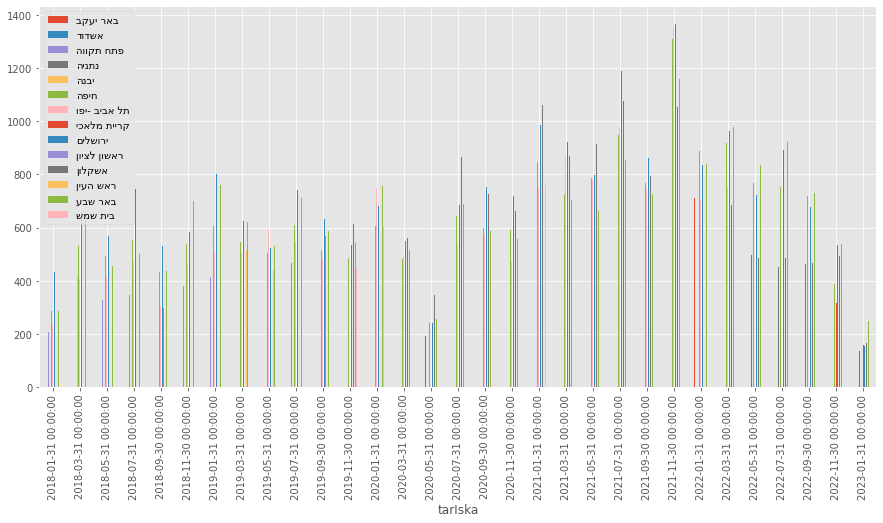

In [35]:
df.resample('2M')['yeshuv']\
.apply(lambda x: x.apply(lambda x: x[::-1]).value_counts().head(5)).unstack().plot(kind='bar', stacked=False, figsize=(15,7))

In [36]:
df['yeshuv'].value_counts()[:15]

ירושלים               21892
באר שבע               20099
חיפה                  19145
אשקלון                16884
תל אביב -יפו          16489
נתניה                 12509
פתח תקווה             12393
ראשון לציון           12055
אשדוד                 11860
בית שמש               10955
רמת גן                 9507
בת ים                  7520
חולון                  7508
מודיעין-מכבים-רעות     7061
חדרה                   6981
Name: yeshuv, dtype: int64

In [37]:
cond_room_range = (df['misHadarim'] >= 3) & (df['misHadarim'] <= 5)
center_cities = ['הרצלייה', 'בת ים', "רמת גן", "ראשון לציון", "חולון", "תל אביב - יפו", "רמת השרון"]
cond_city = (df['yeshuv'].isin(["באר שבע"]))
cond_location = (df['yeshuv'].isin(center_cities))

<AxesSubplot:xlabel='tarIska'>

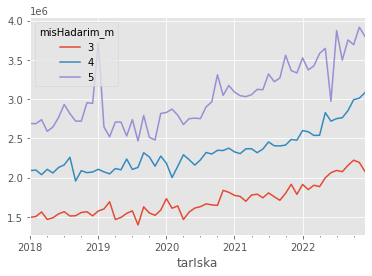

In [38]:
df[cond_room_range& cond_location][['misHadarim_m', 'mcirMozhar']].groupby('misHadarim_m')\
.resample('M')['mcirMozhar'].mean().unstack().T.ffill().plot(kind="line", stacked=False)  #  & cond_location

In [39]:
df[cond & cond_room_range & cond_city]

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,tava,mahutZchut,helekNimkar,corX,corY,insertionDate,year_sold_built_diff,newOrUsed,misHadarim_m,avg_per_m_net
tarIska,,,,,,,,,,,,,,,,,,,,,
2022-12-14,90 - מק-באר שבע,038089-0101-037-00,באר שבע,התלמוד,60,--,9,520000,520000,71,...,0,בעלות,1,179527,575374,2022-12-18 01:47:28.892752,62,used,3,"8,387"
2022-08-21,90 - מק-באר שבע,038076-0035-031-00,באר שבע,קלישר,50,--,31,910000,910000,90,...,--,בעלות,1,181982,573652,2022-12-18 05:13:49.025878,52,used,4,"11,375"
2022-08-21,90 - מק-באר שבע,038464-0017-001-00,באר שבע,צהל,7,--,1,2035983,2035983,120,...,--,חכירה מאחר,1,182511,570762,2022-12-18 05:13:49.025878,0,new,5,"16,967"
2022-08-21,90 - מק-באר שבע,038491-0005-039-00,באר שבע,צהל - ללא רחוב,0,--,0,2270000,2270000,138,...,0,חכירה ממינהל,1,176529,574042,2022-12-18 05:13:49.025878,0,new,5,"16,449"
2022-08-21,90 - מק-באר שבע,038367-0008-002-00,באר שבע,דב ברנע,17,--,2,1808000,1808000,120,...,--,בעלות כפופה לחכירה,1,181275,577273,2022-12-18 05:13:49.025878,52,used,5,"15,067"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,90 - מק-באר שבע,038094-0030-015-00,באר שבע,מבצע יואב,33,--,15,700000,700000,65,...,--,בעלות,1,179055,574392,2023-01-17 09:55:04.834013,32,used,3,"10,769"
2022-12-07,90 - מק-באר שבע,038602-0001-000-00,באר שבע,צהל - ללא רחוב,10,--,123,1465983,1465983,109,...,--,בעלות כפופה לחכירה,1,0,0,2023-01-17 09:56:30.120533,1,used,4,"13,449"
2022-12-08,90 - מק-באר שבע,038116-0038-012-00,באר שבע,ביאליק,123,--,7,745000,745000,62,...,--,בעלות,1,179800,572759,2023-01-17 09:54:16.572534,52,used,3,"14,327"


17513


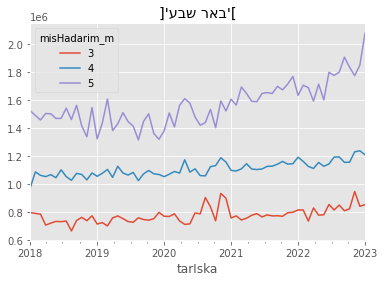

In [40]:
def plot_prices_over_time(df, conditions):
    df_s = df[conditions]
    print(len(df_s))
    # print(df_s.head())
    cities = str(df_s['yeshuv'].unique()[:5])[::-1]
#     df_s = df_s[['misHadarim_m', 'mcirMozhar']]
    df_s.groupby('misHadarim_m').resample('4W')['mcirMozhar'].mean().unstack().T.ffill().plot(kind="line", stacked=False, title=cities) # .plot()
plot_prices_over_time(df, cond_room_range & (df['yeshuv'] == "באר שבע"))

In [41]:
df[cond & cond_room_range][['misHadarim_m', 'avg_per_m_net']].groupby('misHadarim_m').resample('4W')['avg_per_m_net'].mean() # .unstack().T.plot(kind='line', stacked=False, figsize=(20,10), title="Change in price per meter (neto)") # .resample('1W').mean() # .apply() # ['misHadarim_m'].value_counts()

misHadarim_m  tarIska   
3             2018-01-07   17,448
              2018-02-04   17,302
              2018-03-04   16,924
              2018-04-01   17,333
              2018-04-29   17,854
                            ...  
5             2022-09-11   20,193
              2022-10-09   18,860
              2022-11-06   21,120
              2022-12-04   19,684
              2023-01-01   20,712
Name: avg_per_m_net, Length: 198, dtype: float64

In [42]:
df.columns

Index(['ezor', 'gush', 'yeshuv', 'rechov', 'bayit', 'knisa', 'dira',
       'mcirMozhar', 'mcirMorach', 'shetachBruto', 'shetachNeto', 'shnatBniya',
       'misHadarim', 'lblKoma', 'misKomot', 'dirotBnyn', 'hanaya', 'malit',
       'sugIska', 'tifkudBnyn', 'tifkudYchida', 'shumaHalakim', 'mofaGush',
       'tava', 'mahutZchut', 'helekNimkar', 'corX', 'corY', 'insertionDate',
       'year_sold_built_diff', 'newOrUsed', 'misHadarim_m', 'avg_per_m_net'],
      dtype='object')

In [43]:
cond_yad_2 = (df['shnatBniya'] <=2020)

In [44]:
df[cond_yad_2]

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,tava,mahutZchut,helekNimkar,corX,corY,insertionDate,year_sold_built_diff,newOrUsed,misHadarim_m,avg_per_m_net
tarIska,,,,,,,,,,,,,,,,,,,,,
2022-12-14,90 - מק-באר שבע,038089-0101-037-00,באר שבע,התלמוד,60,--,9,520000,520000,71,...,0,בעלות,1,179527,575374,2022-12-18 01:47:28.892752,62,used,3,"8,387"
2022-12-14,30 - מק-ירושלים,030695-0022-081-00,ירושלים,פרימו לוי,1,--,10,2500000,2500000,68,...,0,בעלות,1,221360,628727,2022-12-18 01:47:28.892752,13,used,3,"36,765"
2022-12-14,50 - מק-תל אביב,007151-0238-007-00,בת ים,ההגנה,32,--,0,1985000,1985000,90,...,0,בעלות,1,176834,658905,2022-12-18 01:47:28.892752,6,used,3,"22,056"
2022-12-14,65 - מק-חדרה,010570-0048-004-00,חדרה,שיבת ציון,43,--,0,3030000,3030000,148,...,0,בעלות,1,189047,704898,2022-12-18 01:47:28.892752,72,used,5,"79,737"
2022-12-14,84 - מק-רחובות,002071-0139-000-00,אשדוד,יהודה הלוי,22,--,41,2500000,2500000,146,...,0,חכירה מאחר,1,166876,633662,2022-12-18 01:47:28.892752,11,used,4,"22,124"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11,40 - מק-חיפה,010457-0015-008-00,קריית ביאליק,ברנר,3,--,10,334652,334652,33,...,--,בעלות כפופה לחכירה,1,209360,751597,2023-01-17 09:50:08.755156,52,used,-2,"10,141"
2022-12-11,40 - מק-חיפה,018990-0029-005-00,כרמיאל,מורד הגיא,95,--,5,78900,78900,72,...,--,בעלות כפופה לחכירה,1,228030,756672,2023-01-17 09:50:08.755156,52,used,3,"1,096"
2022-12-11,40 - מק-חיפה,019069-0021-025-00,כרמיאל,אשכולות,70,--,1,257640,257640,70,...,--,בעלות כפופה לחכירה,1,227497,757041,2023-01-17 09:46:41.596859,29,used,-2,"3,681"


In [45]:
df['shnatBniya'].value_counts().sort_index()[-30:]

2004     2954
2005     3437
2006     2646
2007     2787
2008     3302
2009     3147
2010     5250
2011     3376
2012     4667
2013     5535
2014     5986
2015     7919
2016     8911
2017    15380
2018    27972
2019    33968
2020    29735
2021    27583
2022    19485
2023     6592
2024     4033
2025     2773
2026      326
2027      254
2028       87
2029        2
2030       12
2031       13
2032        2
2033        2
Name: shnatBniya, dtype: int64

In [46]:
df['gush']

tarIska
2022-12-14    038089-0101-037-00
2022-12-14    006386-0170-032-00
2022-12-14    030695-0022-081-00
2022-12-14    007151-0238-007-00
2022-12-14    010570-0048-004-00
                     ...        
2022-12-15    006232-0045-017-00
2022-12-15    002530-0038-018-00
2022-12-15    006499-0101-022-00
2022-12-21    038020-0014-001-00
2022-12-31    010572-0272-002-00
Name: gush, Length: 411784, dtype: object

In [47]:
df['tifkudYchida'].unique()

array(['דירה בבית קומות', 'מחברה לפרטי', 'מחברה לחברה', 'דירת גן',
       'קוטג דו-משפחתי', 'קוטג חד-משפחתי', 'דירת דופלקס',
       'דירת גג )פנטהאוז(', 'בית בודד', 'קוטג טורי', 'דירה במלון דירות',
       'מפרטי לפרטי', 'מפרטי לחברה', 'בבנין מעורב מגורים'], dtype=object)

In [48]:
df['mahutZchut'].unique()

array(['בעלות', 'חכירה מאחר', 'חכירה ממינהל', 'בעלות כפופה לחכירה', '--',
       'חכירה ממינהל 49 שנים', 'בעלות בנכס מוגן', 'הרשאה לשימוש בנכס',
       'חכירה ממינהל 1 שנה', 'חכירה ממינהל 25 שנים',
       'חכירה ממינהל 98 שנים', 'חכירה ממינהל 99 שנים',
       'חכירה מאחר 49 שנים', 'חכירה ממינהל 5 שנים', 'חכירה ממינהל 3 שנים',
       'חכירה ממינהל 6 שנים', 'חכירה מאחר 99 שנים',
       'חכירה ממינהל 19 שנים', 'חכירה ממינהל 2 שנים', 'חכירה מאחר 1 שנה',
       'חכירה ממינהל 47 שנים', 'חכירה ממינהל 9 שנים',
       'חכירה מאחר 98 שנים', 'חכירה ממינהל 55 שנים',
       'חכירה ממינהל 50 שנים', 'חכירה ממינהל 48 שנים',
       'חכירה ממינהל 80 שנים', 'חכירה מאחר 80 שנים',
       'חכירה ממינהל 31 שנים', 'חכירה מאחר 3 שנים',
       'חכירה ממינהל 59 שנים', 'חכירה ממינהל 11 שנים',
       'חכירה ממינהל 79 שנים', 'חכירה ממינהל 10 שנים',
       'חכירה ממינהל 39 שנים', 'חכירה מאחר 25 שנים', 'חכירה מאחר 4 שנים',
       'חכירה ממינהל 89 שנים', 'חכירה ממינהל 56 שנים',
       'חכירה ממינהל 69 שנים', 'חכירה ממ

In [49]:
df_g[df_g['size'] > 8]

mean     std  size
yeshuv    misHadarim shnatBniya                        
אבן יהודה 2          1999         417,237  91,543     9
אבני חפץ  3          1990         548,750 208,864    16
                     2018         777,333 133,385    15
          4          2018         788,412  49,684    17
                     2019         823,133  73,606    15
...                                   ...     ...   ...
תל מונד   5          2021       3,158,352 349,775    28
          6          2017       2,815,450 467,309    20
                     2018       2,823,032 354,074    25
                     2020       3,020,043 411,686    44
                     2018       2,726,232  40,410     9

[6627 rows x 3 columns]

In [50]:
df['tarIska'] = pd.to_datetime(df['tarIska'], format='%Y%m%d')
df.resample('2w').size().plot()

KeyError: 'tarIska'

In [ ]:
df.index.min()

In [ ]:
df.groupby('tarIska').size().plot()

In [ ]:
central_cities = ['רמת גן', 
                 'ראשון לציון',
                 'תל אביב -יפו',
                 'גבעתיים',
                 'בת ים',
                 'חולון',
                 'רמת השרון',
                 'הרצלייה',]

In [51]:
df[df['yeshuv'].isin(central_cities)].groupby('tarIska').size().plot()

NameError: name 'central_cities' is not defined

In [52]:
df['yeshuv'].unique()

array(['באר שבע', 'פתח תקווה', 'ירושלים', 'בת ים', 'חדרה', 'אשדוד',
       'חולון', 'חיפה', 'גבעתיים', 'אשקלון', 'באר יעקב', 'רעננה',
       'כרמיאל', 'שדרות', 'נתניה', 'כפר יונה', 'הוד השרון', 'עכו',
       'רמת גן', 'ראשון לציון', 'בני ברק', 'כפר סבא', 'קריית ביאליק',
       'רמלה', 'אריאל', 'טבריה', 'נתיבות', 'קריית גת', 'אור יהודה',
       'טירת כרמל', 'תל אביב -יפו', 'דימונה', 'ערד', 'אילת', 'בית שאן',
       'לוד', 'קריית שמונה', 'חריש', 'עפולה', 'קריית ים', 'נהרייה',
       'יבנה', 'קריית מוצקין', 'קריית אונו', 'קריית אתא', 'רמת ישי',
       'רמת השרון', 'גבעת זאב', 'כפר אדומים', 'ראש העין', 'זכרון יעקב',
       'מגדל העמק', 'מרום גולן', 'אור עקיבא', 'פרדס חנה-כרכור',
       'חצור הגלילית', 'נצרת', 'בית שמש', 'מעלות-תרשיחא', 'נס ציונה',
       'מצפה רמון', 'עמנואל', 'מזכרת בתיה', 'דפנה', 'אזור', 'קריית מלאכי',
       'נוף הגליל', 'הרצלייה', 'צפת', 'אלעד', 'אופקים', 'רחובות', 'נשר',
       'בת חפר', 'גדרה', 'מודיעין-מכבים-רעות', 'יקנעם עילית', 'אלפי מנשה',
       'גני תקווה', 'גב

In [53]:
df.groupby('tarIska').size()

tarIska
2018-01-01    252
2018-01-02    239
2018-01-03    311
2018-01-04    289
2018-01-05     62
             ... 
2022-12-27     78
2022-12-28    101
2022-12-29    108
2022-12-30     29
2022-12-31      3
Length: 1818, dtype: int64

In [54]:
import folium

In [55]:
from pyproj import Transformer
trans_itm_to_wgs84 = Transformer.from_crs(2039, 4326)

In [56]:
df_s = df.sample(500)

In [57]:
color_rooms = {1: 'black', 2: 'gray', 3: 'green', 4: 'cadetblue', 5: 'darkpurple', 6: 'red'}

In [58]:
m = folium.Map(location=[*trans_itm_to_wgs84.transform(185118, 666233)], zoom_start=8)
for idx, row in df_s.iterrows():
    if row['corX'] == 0 and row['corY'] == 0:
        continue
#     dt = str(pd.to_datetime(row['tarIska'], format='%Y%m%d').date())
    dt = idx
    price_mr_net = row['mcirMozhar'] / row['shetachNeto'] if row['shetachNeto'] > 0 else -1
    price_mr_bruto = row['mcirMozhar'] / row['shetachBruto']  if row['shetachBruto'] > 0 else -1
    tooltip = f"{row['ezor']}<br>{dt}<br>{row['yeshuv']}, {row['rechov']}, {row['bayit']}<br>{row['shnatBniya']} {row['misHadarim']} חדרים<br>{row['mcirMozhar']:0,.0f}, {price_mr_net:0,.0f}"
#     print(row['misHadarim'])
    folium.Marker([*trans_itm_to_wgs84.transform(row['corX'], row['corY'])],
                  popup="<i>Mt. Hood Meadows</i>",
                  tooltip=tooltip,
                  # https://fontawesome.com/icons?d=gallery
                  icon=folium.Icon(color=color_rooms[min(int(row['misHadarim']), 6)],
                                   icon="fa-light fa-house", prefix='fa')
                 ).add_to(m)

In [59]:
m

In [ ]:
df

In [ ]:
# https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data/notebook

In [ ]:
from folium.plugins import HeatMap
m = folium.Map(location=[*trans_itm_to_wgs84.transform(185118, 666233)], zoom_start=8)
# Filter the DF for rows, then columns, then remove NaNs
# heat_df = df_acc[df_acc['Speed_limit']=='40'] # Reducing data size so it runs faster
# heat_df = df_acc[df_acc['Year']=='2007'] # Reducing data size so it runs faster
# heat_df = heat_df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[*trans_itm_to_wgs84.transform(row['corX'], row['corY'])] for index, row in df.iterrows()]
heat_data
# Plot it on the map
HeatMap(heat_data).add_to(m)
m

In [ ]:
from folium.plugins import HeatMapWithTime
# Create weight column, using date
# heat_df['Weight'] = df_acc['Date'].str[3:5]
# heat_df['Weight'] = heat_df['Weight'].astype(float)
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])

head_data = []
timestamps = []
for g_name, df_g in df.resample('M'):
#     print([[*trans_itm_to_wgs84.transform(row['corX'], row['corY'])] for index, row in df_g.iterrows()])
    points = [[*trans_itm_to_wgs84.transform(row['corX'], row['corY']), 0.1] for index, row in df_g.iterrows()]
    head_data.append(points)
    timestamps.append(str(pd.to_datetime(g_name, format='%Y%m%d').date()))
#     print(df_g)
#     break

# [[*trans_itm_to_wgs84.transform(row['corX'], row['corY'])] for index, row in df.iterrows()]
# List comprehension to make out list of lists
# heat_data = [[[row['Latitude'],row['Longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,13)]



In [ ]:
len(head_data)

In [ ]:
# Plot it on the map
m = folium.Map(location=[*trans_itm_to_wgs84.transform(185118, 666233)], zoom_start=8)
hm = HeatMapWithTime(head_data, index=timestamps, auto_play=True, scale_radius=False)
# hm = HeatMapWithTime(head_data[:5], index=timestamps[:5], scale_radius=False, radius=4, blur=0.3, auto_play=True,max_opacity=0.8, min_speed=1)
hm.add_to(m)
m

In [ ]:
len(timestamps)

In [ ]:
df.groupby(['ezor', 'misHadarim'])['mcirMozhar'].mean() # mcirMozhar'] / row['shetachNeto'] if row['shetachNeto

In [ ]:
import matplotlib.pyplot as plt
for name, df_g in df.groupby('ezor'):
    df_g.groupby('misHadarim')['mcirMozhar'].mean().plot.bar(title=name[::-1])
    plt.ylim([500000, 8000000])
    plt.xlim([1.5, 6.5])
    plt.grid(axis='y')
    plt.show()
# , 'misHadarim']['mcirMozhar'].mean():

In [ ]:
df_g.groupby('misHadarim')['mcirMozhar'].mean()

In [259]:
# filter cities with low number of deals over 4 years...
ser = df.groupby('yeshuv').filter(lambda x: len(x) > 5000).groupby('yeshuv').resample('M').size().T # .to_frame().query('"0" > 0') # .pct_change().groupby(level=1).max() # .to_frame() # rolling(3).mean().to_frame()
ser = ser.pct_change(axis=0).dropna()
# max_cities_per_period = ser.idxmax(axis=1)
display(ser.tail(3).style.background_gradient(axis=0))
# Find highest increase in sells city in the period, decrease in sells
stats = ser.apply(lambda row: (row.idxmax(), row.loc[row.idxmax()], row.idxmin(), row.loc[row.idxmin()]),axis=1)
pd.DataFrame(stats.tolist(), index=stats.index).tail(3)

yeshuv,אילת,אשדוד,אשקלון,באר שבע,בית שמש,בני ברק,בת ים,הרצלייה,חדרה,חולון,חיפה,ירושלים,מודיעין-מכבים-רעות,נהרייה,נתיבות,נתניה,עפולה,פתח תקווה,קריית אתא,קריית גת,ראשון לציון,רחובות,רמלה,רמת גן,תל אביב -יפו
tarIska,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-31 00:00:00,-0.278481,-0.238710,-0.206897,-0.360606,-0.127119,-0.301205,-0.500000,-0.577778,-0.370370,-0.298701,-0.534247,-0.207715,-0.400000,-0.471264,-0.465753,-0.500000,-0.466019,-0.316901,-0.490000,-0.318681,-0.518519,-0.089286,-0.426471,-0.302326,-0.407407
2022-11-30 00:00:00,0.298246,0.432203,0.673913,0.554502,-0.262136,0.482759,0.204545,1.210526,0.843137,0.018519,0.288235,0.000000,0.629630,0.913043,0.384615,1.817073,1.090909,0.701031,0.647059,0.403226,1.092308,-0.058824,0.205128,-0.055556,0.375000
2022-12-31 00:00:00,-0.445946,-0.431953,-0.464286,-0.243902,-0.171053,-0.406977,-0.264151,-0.071429,-0.478723,-0.090909,-0.652968,-0.419476,-0.363636,-0.272727,-0.407407,-0.411255,-0.321739,-0.351515,-0.571429,-0.402299,-0.389706,0.145833,-0.085106,-0.329412,-0.659091


,0,1,2,3
tarIska,,,,
2022-10-31,רחובות,-0.089286,הרצלייה,-0.577778
2022-11-30,נתניה,1.817073,בית שמש,-0.262136
2022-12-31,רחובות,0.145833,תל אביב -יפו,-0.659091


In [187]:
max_cities_per_period

tarIska
2018-02-28             יבנה
2018-03-31      קריית שמונה
2018-04-30         גבעת זאב
2018-05-31             גדרה
2018-06-30            אריאל
2018-07-31        מגדל העמק
2018-08-31        אור יהודה
2018-09-30       זכרון יעקב
2018-10-31        מגדל העמק
2018-11-30        אור יהודה
2018-12-31        רמת השרון
2019-01-31             יהוד
2019-02-28        אור עקיבא
2019-03-31      יקנעם עילית
2019-04-30             שוהם
2019-05-31             שוהם
2019-06-30          הרצלייה
2019-07-31       קריית אונו
2019-08-31         באר יעקב
2019-09-30         גבעת זאב
2019-10-31        אור יהודה
2019-11-30        טירת כרמל
2019-12-31            שדרות
2020-01-31             גדרה
2020-02-29            בת ים
2020-03-31              נשר
2020-04-30            טבריה
2020-05-31    מודיעין עילית
2020-06-30             גדרה
2020-07-31       זכרון יעקב
2020-08-31       קריית אונו
2020-09-30        אור עקיבא
2020-10-31             נצרת
2020-11-30             אלעד
2020-12-31       קריית אונו
2021-01-31  

In [184]:
ser

yeshuv,אופקים,אור יהודה,אור עקיבא,אילת,אלעד,אריאל,אשדוד,אשקלון,באר יעקב,באר שבע,...,ראש העין,ראשון לציון,רחובות,רמלה,רמת גן,רמת השרון,רעננה,שדרות,שוהם,תל אביב -יפו
tarIska,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,0.000000,-0.421053,-0.518519,-0.294118,-0.150000,-0.470588,-0.153846,-0.064706,0.029412,0.140845,...,-0.267442,-0.137255,-0.135417,0.661765,-0.201389,0.080000,-0.245614,-0.488889,0.352941,-0.217021
2018-03-31,0.620000,0.363636,0.230769,0.050000,-0.235294,0.444444,0.314685,0.025157,0.057143,0.033951,...,0.365079,0.193182,0.349398,1.070796,-0.017391,-0.333333,0.465116,0.173913,-0.347826,0.211957
2018-04-30,-0.382716,-0.333333,-0.500000,-0.269841,-0.384615,-0.615385,-0.377660,-0.257669,-0.540541,-0.495522,...,-0.267442,-0.400000,-0.312500,-0.529915,-0.176991,-0.277778,-0.523810,-0.296296,-0.333333,-0.215247
2018-05-31,-0.140000,-0.500000,2.625000,0.304348,0.750000,1.000000,0.495726,0.504132,0.941176,0.692308,...,-0.190476,0.317460,0.649351,0.336364,0.344086,0.230769,1.166667,1.105263,1.300000,0.371429
2018-06-30,0.093023,1.000000,-0.586207,-0.083333,0.785714,1.500000,-0.091429,0.010989,0.000000,-0.136364,...,-0.039216,-0.024096,-0.165354,-0.285714,-0.056000,-0.062500,-0.369231,-0.475000,-0.565217,-0.045833
2018-07-31,-0.127660,0.400000,0.250000,0.400000,-0.080000,-0.520000,-0.018868,-0.288043,-0.333333,0.032389,...,0.000000,0.012346,-0.169811,-0.133333,0.059322,0.200000,0.585366,2.190476,0.900000,0.048035
2018-08-31,-0.146341,13.857143,0.200000,-0.012987,-0.086957,0.583333,0.128205,0.320611,0.227273,0.054902,...,1.469388,-0.103659,0.079545,-0.186813,-0.144000,-0.055556,-0.261538,-0.731343,0.210526,-0.262500
2018-09-30,-0.228571,-0.903846,-0.111111,-0.605263,-0.523810,-0.105263,-0.420455,-0.531792,-0.111111,-0.375465,...,-0.685950,0.020408,-0.378947,-0.581081,-0.373832,-0.352941,-0.229167,-0.166667,-0.347826,-0.271186


In [150]:
ser.at[ser.idxmax(axis=1)]

ValueError: Invalid call for scalar access (getting)!

In [109]:
ser.loc[max_cities].to_frame().reset_index().set_index('tarIska')

,yeshuv,0
tarIska,,
2018-01-31,תל אביב -יפו,234
2018-02-28,יבנה,9
2018-03-31,טייבה,25
2018-04-30,עין המפרץ,183
2018-05-31,גדרה,17
2018-06-30,מעוז חיים,8
2018-07-31,מגדל העמק,6
2018-08-31,חוקוק,57
2018-09-30,כפר ורדים,4


In [117]:
x = ser.to_frame().reset_index() # .index

In [118]:
x[x['yeshuv'] == 'אבן יהודה']

,yeshuv,tarIska,0
37,אבן יהודה,2018-01-31,4
38,אבן יהודה,2018-05-31,-1
39,אבן יהודה,2018-06-30,1
40,אבן יהודה,2018-07-31,-0
41,אבן יהודה,2018-08-31,-0
42,אבן יהודה,2018-10-31,0
43,אבן יהודה,2018-11-30,2
44,אבן יהודה,2018-12-31,-0
45,אבן יהודה,2019-01-31,-0
46,אבן יהודה,2019-03-31,0


In [78]:
xxx =df.resample('M')['yeshuv'].value_counts().groupby(level=0).nlargest(1)

In [80]:
xxx

tarIska     tarIska     yeshuv      
2018-01-31  2018-01-31  ירושלים         431
2018-02-28  2018-02-28  יבנה            344
2018-03-31  2018-03-31  באר שבע         335
2018-04-30  2018-04-30  ירושלים         203
2018-05-31  2018-05-31  ירושלים         364
2018-06-30  2018-06-30  ירושלים         375
2018-07-31  2018-07-31  ירושלים         369
2018-08-31  2018-08-31  ירושלים         329
2018-09-30  2018-09-30  ירושלים         200
2018-10-31  2018-10-31  באר שבע         397
2018-11-30  2018-11-30  ירושלים         342
2018-12-31  2018-12-31  ירושלים         421
2019-01-31  2019-01-31  ירושלים         381
2019-02-28  2019-02-28  ירושלים         318
2019-03-31  2019-03-31  ראש העין        391
2019-04-30  2019-04-30  ירושלים         280
2019-05-31  2019-05-31  תל אביב -יפו    340
2019-06-30  2019-06-30  ירושלים         358
2019-07-31  2019-07-31  באר שבע         385
2019-08-31  2019-08-31  ראשון לציון     346
2019-09-30  2019-09-30  ירושלים         349
2019-10-31  2019-10-31  אשקלון         